In [1]:
# import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')


In [3]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:

# Add 'overweight' column
df['overweight'] = (df['weight']/((df.height/100)**2) > 25 ).astype(int)

In [5]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = (df.cholesterol > 1 ).astype(int)
df['gluc'] = (df.gluc > 1 ).astype(int)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


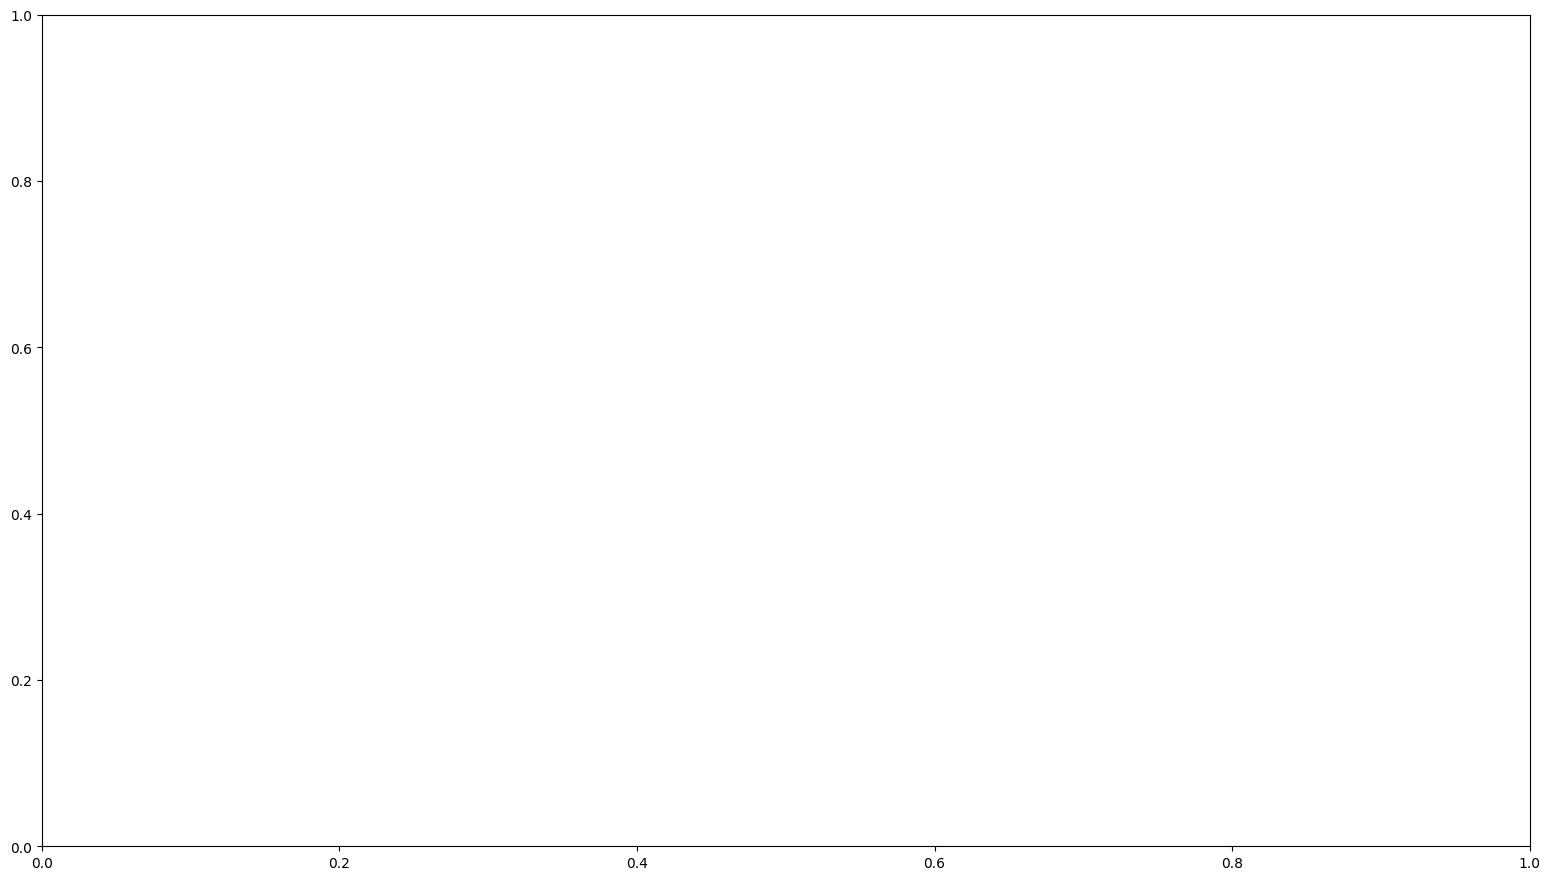

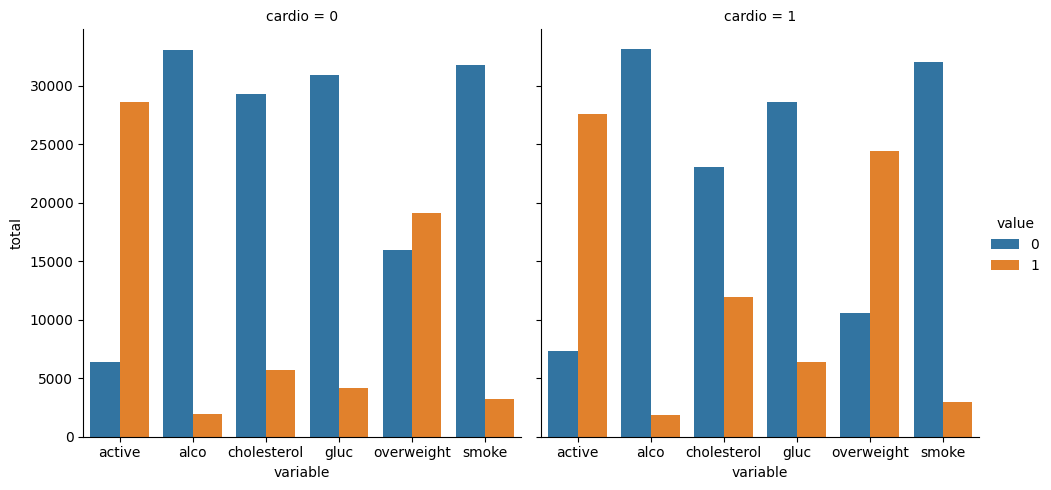

In [6]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke', 'alco', 'active','overweight'])

df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index()

# Draw the catplot with 'sns.catplot()'
fig , axes = plt.subplots(figsize=(19.2,10.8)) 
chart =  sns.catplot(data = df_cat,x ='variable',y = 0,kind = 'bar',hue = 'value',col = 'cardio').set(ylabel = 'total')


In [7]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['id'], value_vars=['cholesterol','gluc','smoke', 'alco', 'active','overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None
    

    # Draw the catplot with 'sns.catplot()'



    # Get the figure for the output
    fig = None 


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


In [8]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [9]:
df.age.min()

10798

In [51]:
# Clean the data
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) & 
                (df['height'] >= df['height'].quantile(0.025) )&
                (df['height'] <= df['height'].quantile(0.975) )& 
                (df['weight'] >= df['weight'].quantile(0.025) )& 
              (  df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr().round(1).astype(float)
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.2,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.2,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


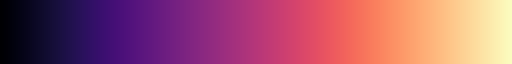

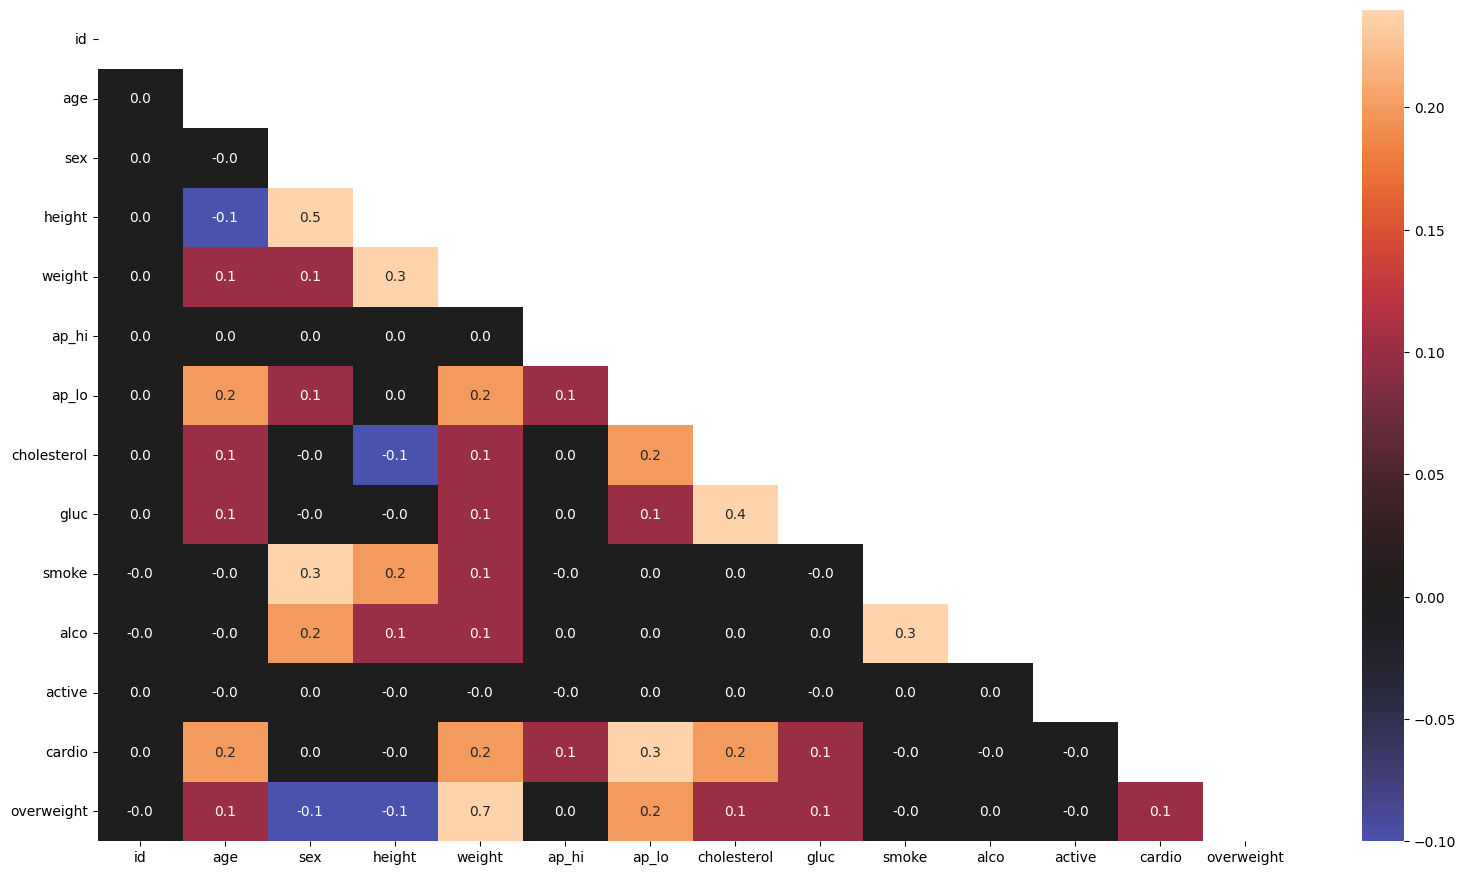

In [104]:
mask = np.ones_like(corr)
mask = np.triu(mask)
fig, ax = plt.subplots(figsize = (19.2,10.8))
sns.heatmap(corr,mask = mask ,vmin = -0.1,vmax= 0.24,fmt = ".1f",center=0.0, annot= True)

#color "ch:s=-.2,r=.6", as_cmap=True
sns.color_palette("magma", as_cmap=True)